# Code Description 
## Exploratory Data Analysis Code 
- This notebook tackles all code related to exploratory data analysis.

## Part 0 : Code Imports

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import cv2


## Part 1 : Code for Counting and Displaying Samples

In [1]:
def count_samples(dir, classes):
    class_counts = {}
    image_lists = {}
    total_images = 0

    # Count images and collect filenames
    for c in classes:
        folder = os.path.join(dir, c)
        images = [
            f for f in os.listdir(folder)
            if f.lower().endswith(('.jpg', '.jpeg', '.png'))
        ]
        class_counts[c] = len(images)
        image_lists[c] = images
        total_images += len(images)

    # Print results
    print("Class Distribution of the Dataset:")
    for c, count in class_counts.items():
        percent = (count / total_images) * 100
        print(f"{c}: {count} images ({percent:.2f}%)")

    # Plot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
    plt.title('Number of Images per Class')
    plt.xlabel('Class')
    plt.ylabel('Images Count')
    plt.show()

    return image_lists  


def display_image(dir, classes, data):
    print("Sample Image for Each Class:")
    for c in classes:
        folder = os.path.join(dir, c)
        images = data[c][:5]  

        plt.figure(figsize=(15, 3))
        for i, img_name in enumerate(images):
            img_path = os.path.join(folder, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"Warning: Failed to load {img_path}")
                continue
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i + 1)
            plt.imshow(img)
            plt.title(c)
            plt.axis('off')
        plt.suptitle(f'Sample Images from Class: {c}')
        plt.show()


## Part 2 : Use Case of Data Visualization Codes

In [3]:
# Run for Binary Classification
dir = 'Dataset'
classes = ['Margin Negative', 'Margin Positive']

In [ ]:
# Run for Multiclass-Classification
dir = 'Dataset MC'
classes = ['Normal', 'Primary Tumor', 'Cancer Margin']

Class Distribution of the Dataset:
Margin Negative: 345 images (41.67%)
Margin Positive: 483 images (58.33%)


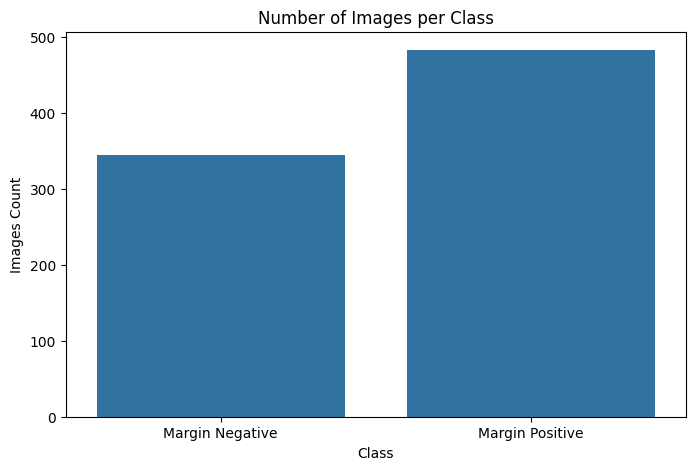

Sample Image for Each Class:


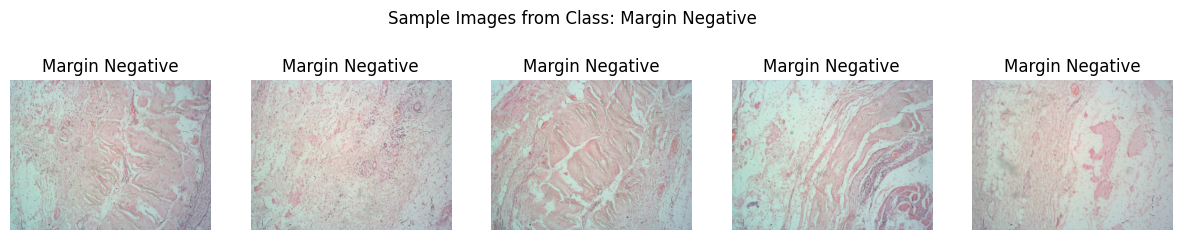

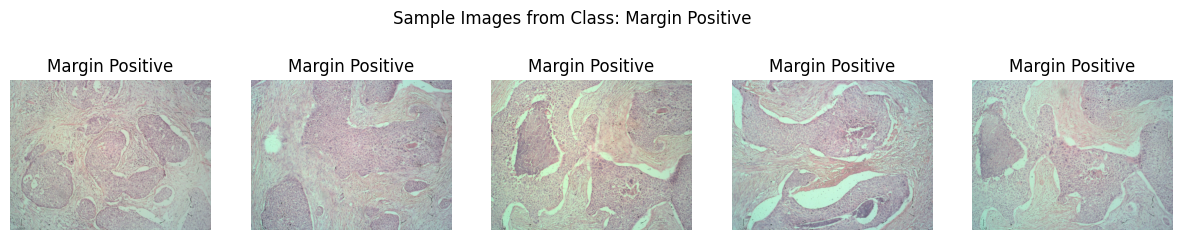

In [4]:
image_data = count_samples(dir, classes)
display_image(dir, classes, image_data)